## (10 pts) k-Nearest Neighbors (kNN) for Credit Card Fraud Detection

We will explore the application of non-parametric model to credit card fraud detection. <br/><br/>
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In this question, you are required to fill in the missing code, marked as `...` and answer inline question by creating mark-down cells.

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### (1 pts) Loading data

In this part, we will use two features only -- `V14` and `V27`

In [6]:
# Importing the dataset
df = pd.read_csv('fraud_data.csv')
X = df[["V14","V27"]].values
y = df["Class"].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Designate 50% of the observations as test observations. Use random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.5, 
                                                    random_state= 0)


### (1 pts) Scaling data

Using StandardScaler scale features to 0 mean and unit variance Gaussian

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler() # instantiate StandardScaler
X_train = standardScaler.fit_transform(X_train) # fit and tranform the training data
X_test = standardScaler.fit_transform(X_test) # tranform test data

### (1 pts) Finding best k

Using GridSearch find the best parameter value for k

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, accuracy_score

In [15]:
# Define param_map for different values of k
param_grid = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

# Fitting K-NN to the Training set. Use p=2 for Euclidean distance.
kNN = KNeighborsClassifier(p=2) # instantiate KNeighborsClassifier

# Use 5-fold cross validation to select best k
# use 'recall' metric to evaluate your model 

cmodel = GridSearchCV(kNN, param_grid=param_grid, cv=5,scoring="recall", n_jobs=2, return_train_score=True) # instantiate GridSearchCV
cmodel.fit(X_train, y_train)

best_k = cmodel.best_params_ # get the best k learned through grid search
print('k = {} is selected using grid search'.format(best_k))

# Fit a KNeighborsClassifier using the best parameters from grid search. Use p=2 for Euclidean distance
kNN = KNeighborsClassifier(n_neighbors=best_k["n_neighbors"], p=2)
kNN.fit(X_train, y_train)

# performance on Test Data
print('kNN recall = {}\nkNN accuracy = {}'.format(recall_score(y_test, kNN.predict(X_test)), 
                                                   accuracy_score(y_test, kNN.predict(X_test))))

k = {'n_neighbors': 3} is selected using grid search
kNN recall = 0.7206703910614525
kNN accuracy = 0.9934544113579792


### (4 pts) Visualizing and comparing decison boundaries of Logistic Regression and kNN



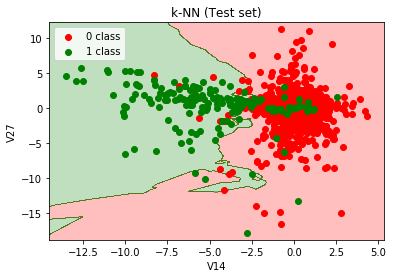

In [16]:
# Visualising kNN 
# on the Test set results
from matplotlib.colors import ListedColormap

# copying X_test, y_test to X_set and y_set. Remeber X has two columns
X_set, y_set = X_test, y_test 

# creating a meshgrid where each point is classifed using learned kNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kNN.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# You need to fill-in the code in the following few lines

# scatter plot: Observations from X_set's fisrt dimension vs X_set's second dimension 
# such that observations belong to class 0
plt.scatter(X_set[np.argwhere(y_test==0),0], X_set[np.argwhere(y_test==0),1], c = 'red', label = '0 class')

# scatter plot: Observations from X_set's fisrt dimension vs X_set's second dimension 
# such that observations belong to class 1
plt.scatter(X_set[np.argwhere(y_test==1),0], X_set[np.argwhere(y_test==1),1], c = 'green', label = '1 class')

plt.title('k-NN (Test set)')
plt.xlabel('V14')
plt.ylabel('V27')
plt.legend()
plt.show()

Fitting a Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score
# We will use default parameters for Logistic Regression here
logR = LogisticRegression() # instantiate LogisticRegression
logR.fit(X_train, y_train)


# Performance on Test data
print('Logistic Regression recall = {}\nLogistic Regression accuracy = {}'.format(recall_score(y_test, logR.predict(X_test)), 
                                                   accuracy_score(y_test, logR.predict(X_test))))

Logistic Regression recall = 0.7206703910614525
Logistic Regression accuracy = 0.9939153683046004


/Users/emmanuel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


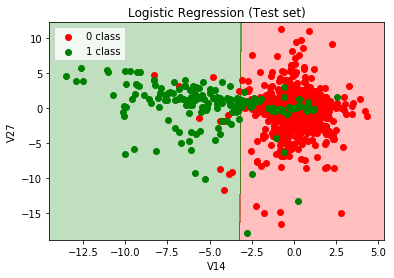

In [18]:
# Visualizing Logistic Regression on Test data
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# You need to fill-in the code in the following few lines

# scatter plot: Observations from X_set's fisrt dimension vs X_set's second dimension 
# such that observations belong to class 0
plt.scatter(X_set[np.argwhere(y_test==0),0], X_set[np.argwhere(y_test==0),1], c = 'red', label = '0 class')

# scatter plot: Observations from X_set's fisrt dimension vs X_set's second dimension 
# such that observations belong to class 1
plt.scatter(X_set[np.argwhere(y_test==1),0], X_set[np.argwhere(y_test==1),1], c = 'green', label = '1 class')

plt.title('Logistic Regression (Test set)')
plt.xlabel('V14')
plt.ylabel('V27')
plt.legend()
plt.show()

**What is the difference between the decision boundaries of kNN and Logistic Regression? Why would you expect the decision boundaries to be different? Explain in 2-3 sentences.**

The decision boundary for knn is non linear while the Logistic regressio one is. I expected this behavior because knn is low, which means that the shape it will take is very sensitive to each observation

### (3 pts) Running time for Logistic Regression and kNN
For run time comparison, we will use all the features in the dataset.

In [10]:
# Creating train-test set using full dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, 
random_state= 0) # do a train-test split and designate 50% samples as test set

In [11]:
import time

In [12]:
# Comparing Training time

# Fitting Logistic Regression using default parameters
logR = LogisticRegression() # instantiate Logistic Regression 
start_time = time.time()
logR.fit(X_train, y_train)        #fit logR on X_train, y_train
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for Logistic Regression training is {} seconds'.format(elapsed_time))


# Fitting kNN using default parameters
kNN = KNeighborsClassifier() # instantiate KNeighborsClassifier
start_time = time.time()
kNN.fit(X_train, y_train)       # fir kNN on X_train, y_train
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for kNN classifier training is {} seconds'.format(elapsed_time))



Elapsed time for Logistic Regression training is 0.16475701332092285 seconds
Elapsed time for kNN classifier training is 0.010354995727539062 seconds


/Users/emmanuel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**What do you notice about the training time for the two classifiers? Explain why you observed this in 1-2 sentences.**  

Logistic regresion is about 15 times slower than knn at training time than knn. This is because knn is not defining parameters at test time like logistic regression is. 

In [13]:
# Comparing Test time

# Prediction using Logistic Regression
start_time = time.time()
y_pred = logR.predict(X_test) # use logR to predict on X_test
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for Logistic Regression prediction is {} seconds'.format(elapsed_time))

# Prediction using kNN
start_time = time.time()
y_pred = kNN.predict(X_test) # use kNN to predict on X_test
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for kNN prediction is {} seconds'.format(elapsed_time))


Elapsed time for Logistic Regression prediction is 0.0016016960144042969 seconds
Elapsed time for kNN prediction is 1.1563560962677002 seconds


**What do you notice about the test time for the two classifiers? Explain why you observed this in 1-2 sentences.**   

Knn is 1000 times slower than logistic regression at test time, is is because knn has to calculate all the knn distnaces for each of the test observations at test time, it cannot do it during training time (like the way logistic regression fits its parameters at training time) 